In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import influence_maximization_algorithms as im
from functools import lru_cache
import networkx as nx

5
5


In [4]:
# Generate the influence data for each matchup
# May take a while
greedy_greedy, greedy_minimax, minimax_greedy, minimax_minimax = im.generate_matchup_influences(10, 10)

[5.83333333 4.19736842 4.80769231 4.84210526 5.7        6.
 5.93333333 5.         4.73333333 4.9       ]


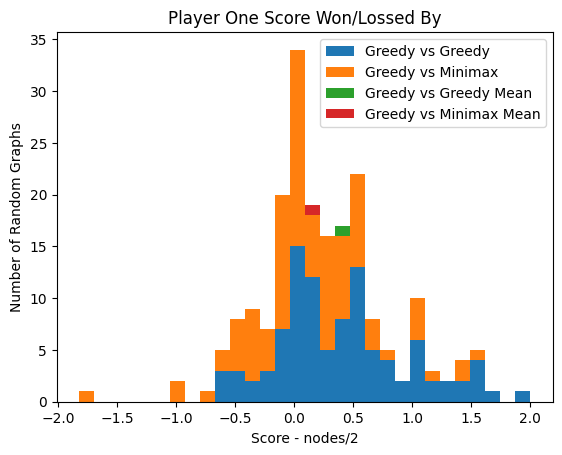

In [3]:
plt.hist([greedy_greedy - 5, greedy_minimax - 5, greedy_greedy.mean() - 5, greedy_minimax.mean() - 5], bins=30, stacked=True)
plt.title("Player One Score Won/Lossed By")
plt.ylabel("Number of Random Graphs")
plt.xlabel("Score - nodes/2")
plt.legend(["Greedy vs Greedy", "Greedy vs Minimax", "Greedy vs Greedy Mean", "Greedy vs Minimax Mean"])

plt.show()

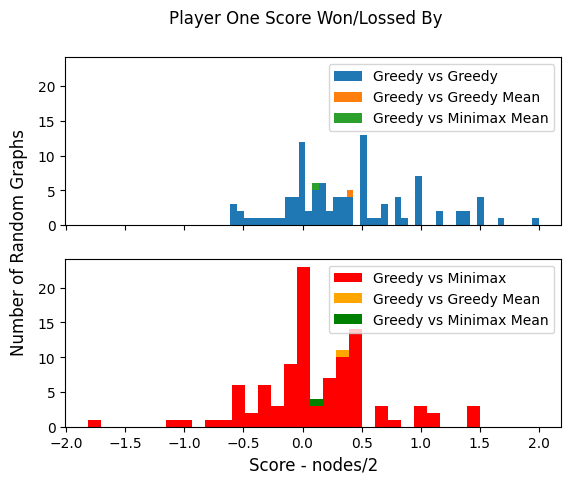

In [4]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Score - nodes/2", fontsize=12)
plt.ylabel("Number of Random Graphs", fontsize=12)

axes[0].hist([greedy_greedy - 5, greedy_greedy.mean() - 5, greedy_minimax.mean() - 5], bins=45, stacked=True)
axes[0].legend(["Greedy vs Greedy", "Greedy vs Greedy Mean", "Greedy vs Minimax Mean"])

axes[1].hist([greedy_minimax - 5, greedy_greedy.mean() - 5, greedy_minimax.mean() - 5], bins=30, stacked=True, color=["red", "orange", "green"])
axes[1].legend(["Greedy vs Minimax", "Greedy vs Greedy Mean", "Greedy vs Minimax Mean"])

plt.tight_layout
plt.suptitle("Player One Score Won/Lossed By")

plt.show()


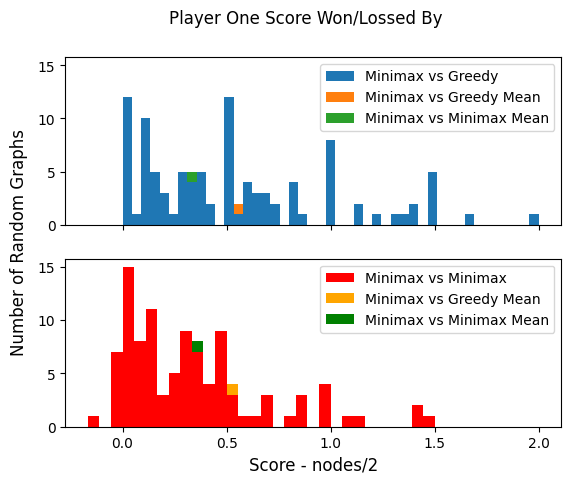

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Score - nodes/2", fontsize=12)
plt.ylabel("Number of Random Graphs", fontsize=12)

axes[0].hist([minimax_greedy - 5, minimax_greedy.mean() - 5, minimax_minimax.mean() - 5], bins=45, stacked=True)
axes[0].legend(["Minimax vs Greedy", "Minimax vs Greedy Mean", "Minimax vs Minimax Mean"])

axes[1].hist([minimax_minimax - 5, minimax_greedy.mean() - 5, minimax_minimax.mean() - 5], bins=30, stacked=True, color=["red", "orange", "green"])
axes[1].legend(["Minimax vs Minimax", "Minimax vs Greedy Mean", "Minimax vs Minimax Mean"])

plt.tight_layout
plt.suptitle("Player One Score Won/Lossed By")

plt.show()


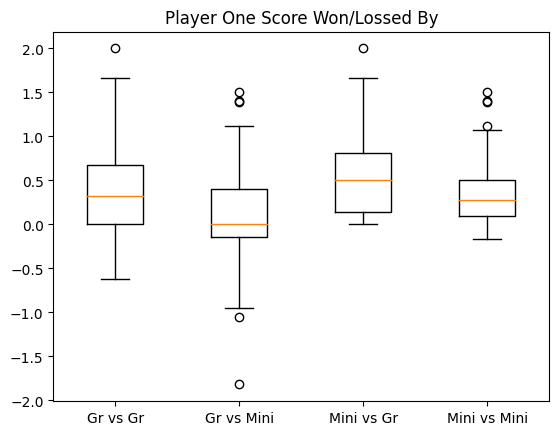

In [6]:
plt.boxplot([greedy_greedy - 5, greedy_minimax - 5, minimax_greedy - 5, minimax_minimax - 5], labels=["Gr vs Gr", "Gr vs Mini", "Mini vs Gr", "Mini vs Mini"])
plt.tight_layout
plt.title("Player One Score Won/Lossed By")
plt.show()

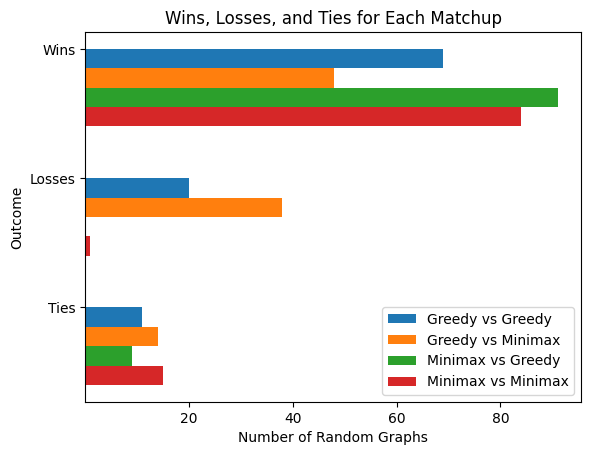

In [7]:
grgr_wins = np.sum(greedy_greedy > 5.0001)
grmi_wins = np.sum(greedy_minimax > 5.0001)
migr_wins = np.sum(minimax_greedy > 5.0001)
mimi_wins = np.sum(minimax_minimax > 5.0001)

grgr_losses = np.sum(greedy_greedy < 4.9999)
grmi_losses = np.sum(greedy_minimax < 4.9999)
migr_losses = np.sum(minimax_greedy < 4.9999)
mimi_losses = np.sum(minimax_minimax < 4.9999)

grgr_ties = np.sum((greedy_greedy > 4.9999) & (greedy_greedy < 5.0001))
grmi_ties = np.sum((greedy_minimax > 4.9999) & (greedy_minimax < 5.0001))
migr_ties = np.sum((minimax_greedy > 4.9999) & (minimax_greedy < 5.0001))
mimi_ties = np.sum((minimax_minimax >= 4.9999) & (minimax_minimax <= 5.0001))

data = ((grgr_ties, grmi_ties, migr_ties, mimi_ties), (grgr_losses, grmi_losses, migr_losses, mimi_losses), (grgr_wins, grmi_wins, migr_wins, mimi_wins))

fig, ax = plt.subplots()
x = np.arange(len(data))

dim = len(data[0])
dimw = 0.6 / dim

for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.barh(x - i * dimw, y,
                dimw, left = 0.001)

ax.set_yticks(x + dimw / 2)
ax.set_yticklabels(["Ties", "Losses", "Wins"])
ax.legend(["Greedy vs Greedy", "Greedy vs Minimax", "Minimax vs Greedy", "Minimax vs Minimax"])

ax.set_title("Wins, Losses, and Ties for Each Matchup")
ax.set_xlabel("Number of Random Graphs")
ax.set_ylabel("Outcome")

plt.show()


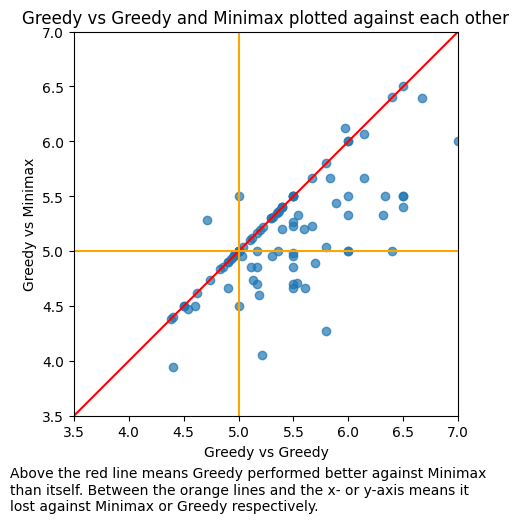

In [8]:
plt.scatter(greedy_greedy, greedy_minimax, alpha=0.7)
plt.xlim(3.5, 7)
plt.ylim(3.5, 7)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(np.linspace(3.5, 7, 100), np.linspace(3.5, 7, 100), color="red")
plt.title("Greedy vs Greedy and Minimax plotted against each other")
plt.xlabel("Greedy vs Greedy")
plt.ylabel("Greedy vs Minimax")
plt.plot(np.linspace(3.5, 7, 100), np.ones(100) * 5, color="orange")
plt.plot(np.ones(100) * 5, np.linspace(3.5, 7, 100), color="orange")
txt="Above the red line means Greedy performed better against Minimax\nthan itself. Between the orange lines and the x- or y-axis means it\nlost against Minimax or Greedy respectively."
plt.figtext(0.1, -.07, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.tight_layout()
plt.show()

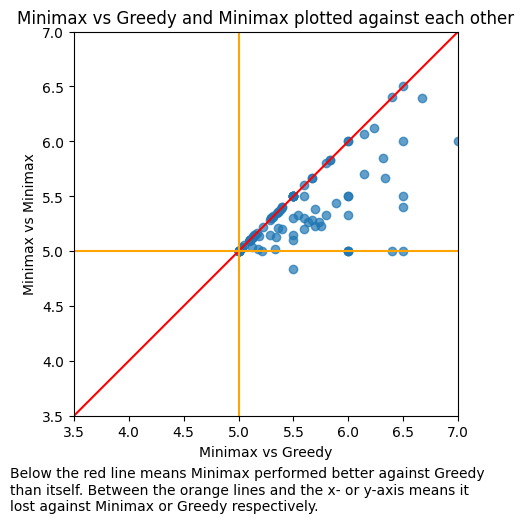

In [9]:
plt.scatter(minimax_greedy, minimax_minimax, alpha=0.7)
plt.xlim(3.5, 7)
plt.ylim(3.5, 7)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.plot(np.linspace(3.5, 7, 100), np.linspace(3.5, 7, 100), color="red")
plt.title("Minimax vs Greedy and Minimax plotted against each other")
plt.xlabel("Minimax vs Greedy")
plt.ylabel("Minimax vs Minimax")
plt.plot(np.linspace(3.5, 7, 100), np.ones(100) * 5, color="orange")
plt.plot(np.ones(100) * 5, np.linspace(3.5, 7, 100), color="orange")
txt="Below the red line means Minimax performed better against Greedy\nthan itself. Between the orange lines and the x- or y-axis means it\nlost against Minimax or Greedy respectively."
plt.figtext(0.1, -.07, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.tight_layout()
plt.show()

# Optimizing

In [29]:
# Optimized Using Alpha-Beta Pruning
def minimax_algorithm_test(graph_laplacian, config, nodes_per_team, depth=np.inf):
    """This function takes in the graph Laplacian, the previously
    selected boundary nodes as an iterable, and the number of nodes
    per team. It returns the best node to add to the boundary set
    using the minimax algorithm.

    Args:
        graph_laplacian ((n,n) ndarray): The graph Laplacian for
        the given graph

        config (ndarray): The previously selected boundary nodes
        in sequential order alternating team

        nodes_per_team (int): The number of nodes per team

    Returns:
        best_node (int): The best node to add to the boundary set
    """


    def minimax_recursive_step(config, depth, alpha, beta):

        if type(config) is not np.ndarray:
            config = np.array(config)

        turn = config.shape[0] % 2  # 0 for maximizing team, 1 for minimizing team

        if depth == 0 or config.shape[0] == nodes_per_team * 2:
            return im.get_influence(graph_laplacian, config.astype(int))[0], None

        nodes_remaining = np.setdiff1d(np.arange(graph_laplacian.shape[0]), config)

        if turn == 0:  # Maximizing team
            value = -np.inf
            best_node = None
            for node in nodes_remaining:
                new_value, _ = minimax_recursive_step(np.append(config, node), depth - 1, alpha, beta)
                # if the value is updated, update the best move
                if value < new_value:
                    value = new_value
                    best_node = node
                # Alpha-Beta Pruning
                if value > beta:
                    break
                alpha = max(alpha, value)
            return value, best_node

        if turn == 1:  # Minimizing team
            value = np.inf
            best_node = None
            for node in nodes_remaining:
                new_value, _ = minimax_recursive_step(np.append(config, node), depth - 1, alpha, beta)
                # if the value is updated, update the best move
                if value > new_value:
                    value = new_value
                    best_node = node
                # Alpha-Beta Pruning
                if value < alpha:
                    break
                beta = min(beta, value)
            return value, best_node

    return minimax_recursive_step(config, depth, -np.inf, np.inf)[1]


In [174]:
example_graph = im.random_graph(25)

In [210]:
%%time
minimax_algorithm_test(example_graph, np.array([]), 2)

CPU times: total: 203 ms
Wall time: 1.2 s


25

In [209]:
%%time
minimax_algorithm_test(example_graph, np.array([]), 2, sorting="betweenness")

[ 6  2 25  5  8 23  7  0 21 12 24 16 19  1 20 10 22 13 15 17  9 11  3 18
 14  4]
CPU times: total: 516 ms
Wall time: 1.27 s


25

In [166]:
%%time
im.minimax_algorithm(example_graph, np.array([]), 2)

CPU times: total: 19.6 s
Wall time: 44.4 s


20

In [111]:
ex7 = np.array([[1, -1, 0, 0, 0, 0, 0],
                [-1, 2, -1, 0, 0, 0, 0],
                [0, -1, 2, -1, 0, 0, 0],
                [0, 0, -1, 2, -1, 0, 0],
                [0, 0, 0, -1, 2, -1, 0],
                [0, 0, 0, 0, -1, 2, -1],
                [0, 0, 0, 0, 0, -1, 1]])

In [13]:
start = np.zeros((2, 8))
end = np.zeros((2, 8))
node_array = np.zeros((2, 8)) - 1
for n in range(8, 23, 3):
    example_graph = im.random_graph(n)

    start[0, n//3 - 2] = time.perf_counter()

    node_0 = minimax_algorithm_test(example_graph, np.array([]), 2)

    end[0, n//3 - 2] = time.perf_counter()

    node_array[0, n//3 - 2] = node_0

    start[1, n//3 - 2] = time.perf_counter()

    node_1 = im.minimax_algorithm(example_graph, np.array([]), 2)

    end[1, n//3 - 2] = time.perf_counter()

    node_array[1, n//3 - 2] = node_1

    print(n)

NameError: free variable 'cent_vals' referenced before assignment in enclosing scope

In [142]:
N = 50
start = np.zeros((5, N // 3 - 2))
end = np.zeros((5, N // 3 - 2))
for n in range(8, N, 3):
    for i in range(5):
        example_graph = im.random_graph(n)

        start[i, n//3 - 2] = time.perf_counter()

        node_0 = minimax_algorithm_test(example_graph, np.array([]), 2)

        end[i, n//3 - 2] = time.perf_counter()

    print(n)

8
11
14
17
20
23
26
29
32
35
38
41
44
47


In [133]:
print(end - start)
print(node_array[0, :] == node_array[1, :])

[[2.16309000e-02 8.51529001e-02 1.23979500e-01 1.77152100e-01
  7.87141900e-01 1.20180810e+00 1.02255330e+00 1.12141806e+01]
 [1.19898800e-01 4.27900200e-01 1.54583330e+00 4.61706160e+00
  1.07766005e+01 2.57212219e+01 5.79655342e+01 1.08676057e+02]]
[ True  True  True  True  True  True  True  True]


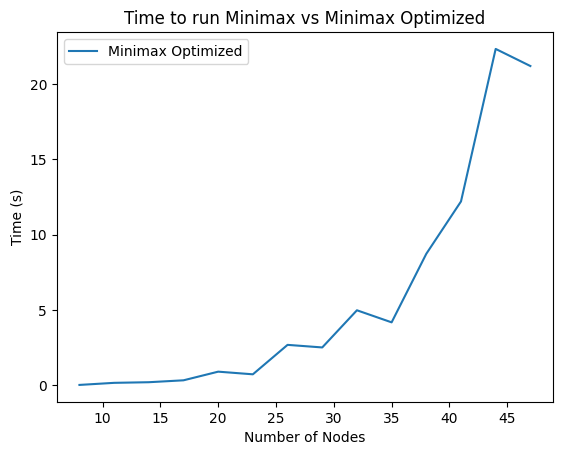

In [144]:
plt.plot(np.arange(8, N, 3), (end.sum(axis=0) - start.sum(axis=0)) / 5, label="Minimax Optimized")
# plt.plot(np.arange(8, 30, 3), end[1, :] - start[1, :], label="Minimax")
plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Time to run Minimax vs Minimax Optimized")
plt.show()

# Presorting Attempts

In [224]:
N = 28
start = np.zeros((5, N // 3 - 2))
end = np.zeros((5, N // 3 - 2))

start_sort = np.zeros((5, N // 3 - 2))
end_sort = np.zeros((5, N // 3 - 2))

for n in range(8, N, 3):
    for i in range(3):
        example_graph = im.random_graph(n)

        start[i, n // 3 - 2] = time.perf_counter()

        node_0 = minimax_algorithm_test(example_graph, np.array([]), 2, sorting=None)

        end[i, n // 3 - 2] = time.perf_counter()

    print(n)

8
11
14
17
20
23
26


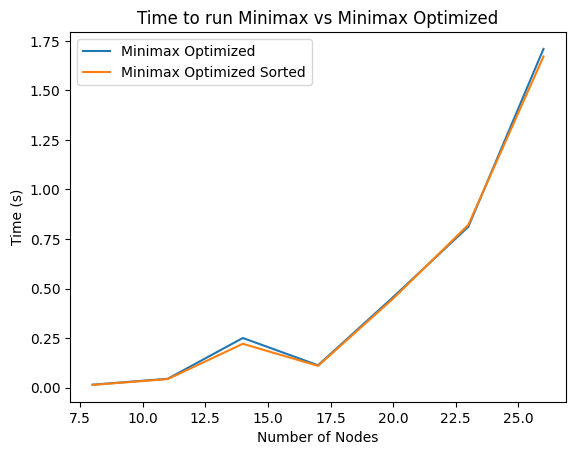

In [225]:
plt.plot(np.arange(8, N, 3), (end.sum(axis=0) - start.sum(axis=0)) / 5, label="Minimax Optimized")
plt.plot(np.arange(8, N, 3), (end_sort.sum(axis=0) - start_sort.sum(axis=0)) / 5, label="Minimax Optimized Sorted")

plt.legend()
plt.xlabel("Number of Nodes")
plt.ylabel("Time (s)")
plt.title("Time to run Minimax vs Minimax Optimized")
plt.show()

In [236]:
example_graph = im.random_graph(10)

In [241]:
%%time
for i in range(1000):
    example_graph = im.random_graph(10)
    im.minimax_algorithm(example_graph, np.array([]), 2)

CPU times: total: 1min 20s
Wall time: 4min 31s


In [8]:
%%time
for i in range(1):
    example_graph = im.random_graph(10)
    minimax_algorithm_test(example_graph, np.array([]), 2, sorting="degree")

CPU times: total: 0 ns
Wall time: 48.4 ms


In [14]:
%%time
for i in range(1000):
    example_graph = im.random_graph(10)
    im.minimax_algorithm_opt(example_graph, np.array([]), 2)

CPU times: total: 13.9 s
Wall time: 58.3 s


In [30]:
n = 100
start = np.zeros((3, n))
end = np.zeros((3, n))
for i in range(n):
    example_graph = im.random_graph(10)

    start[0, i] = time.perf_counter()

    minimax_algorithm_test(example_graph, np.array([]), 2)

    end[0, i] = time.perf_counter()

    start[2, i] = time.perf_counter()

    im.minimax_algorithm_opt(example_graph, np.array([]), 2)

    end[2, i] = time.perf_counter()

print(end - start)

[[0.0670623 0.0255758 0.0280215 0.0608926 0.0150998 0.0297128 0.0403273
  0.04524   0.0467893 0.2056356 0.0179831 0.0620802 0.0376663 0.0199302
  0.0470147 0.0449596 0.075996  0.0228487 0.0576736 0.0519126 0.0255784
  0.0790268 0.0214459 0.0152669 0.0586241 0.0667078 0.0494146 0.0500909
  0.0369332 0.0560948 0.0808362 0.0443792 0.0164536 0.0622435 0.0295948
  0.0401446 0.0345347 0.0557542 0.0174901 0.0103269 0.0364584 0.0788054
  0.0734395 0.0368594 0.0384451 0.0588527 0.0960529 0.0149785 0.0343084
  0.0858571 0.1415276 0.039157  0.0483273 0.0315027 0.0746478 0.0768948
  0.0423616 0.0155201 0.083549  0.1054704 0.1181346 0.0385012 0.0134795
  0.0818532 0.0466552 0.0299128 0.0841535 0.0667511 0.0401579 0.0545378
  0.0407517 0.0534364 0.0469073 0.0589081 0.1373166 0.0134906 0.0519842
  0.0316116 0.0495591 0.0168371 0.0261872 0.1950427 0.0217853 0.0541037
  0.0480001 0.0221236 0.017931  0.0316588 0.0463645 0.041615  0.0269248
  0.0610057 0.022761  0.0447667 0.0848255 0.0451571 0.0445177 0.

In [31]:
times = end - start
print(times.sum(axis=1))

[5.0848299 0.        4.9622654]


In [32]:
print(np.std(times[0]))
print(np.std(times[1]))
print(np.std(times[2]))

0.03354187493396166
0.0
0.030276730228887834


In [9]:
%%time
for i in range(1000):
    example_graph = im.random_graph(10)
    im.greedy_algorithm(example_graph, np.array([]), 2)

CPU times: total: 31.2 ms
Wall time: 107 ms


In [255]:
arr = np.arange(10)[::-1]
print(arr)
arr_diff = np.setdiff1d(arr, np.array([1, 2, 3]))
print(arr_diff)
print(arr_diff[arr])
print(np.random.random(10)[arr_diff])


# store centrality vals
# set diff
# use set diff to index into centrality vals
# argsort new centrality vals
# use that for nodes remaining

[9 8 7 6 5 4 3 2 1 0]
[0 4 5 6 7 8 9]


IndexError: index 9 is out of bounds for axis 0 with size 7

In [28]:
import numpy as np
from time import perf_counter

def lstsq(A, b):
    AA = A.T @ A
    bA = b @ A
    D, U = np.linalg.eigh(AA)
    Ap = (U * np.sqrt(D)).T
    bp = bA @ U / np.sqrt(D)
    return np.linalg.lstsq(Ap, bp, rcond=None)

# create random data
A = np.random.random((10, 10))
b = np.random.random((10,))

# use solver directly
t = perf_counter()
x, *info = np.linalg.lstsq(A, b, rcond=None)
s = perf_counter()
direct_time = s-t
print('direct method:     ', s-t, 'seconds')
# use equivalent reduced system
t = perf_counter()
x_acc, *info_acc = lstsq(A, b)
s = perf_counter()
print('accelerated method:', s-t, 'seconds')
print('results equal:', np.allclose(x, x_acc))
print(direct_time / (s-t), 'times faster')

direct method:      0.0002622001338750124 seconds
accelerated method: 0.0004906000103801489 seconds
results equal: True
0.5344478767373907 times faster


In [ ]:
# knowing the opponent is greedy how we can exploit that
# nash equilibrium
# put another week into scaling
# when is greedy a good strategy
# large graphs where computing optimal is impossible nearly
# if certain graph structures allow you to take advantage of it
# statistical irregularities that allow you to get ahead



# Playing Against Greedy

In [3]:
def get_influence_testing(graph_laplacian, config):
    """This function takes in the graph Laplacian and the previously
    selected boundary nodes as columns of a matrix with each column
    representing a different boundary node set. It returns the influence
    had by each team in the graph.

    Args:
        graph_laplacian ((n,n) ndarray): The graph Laplacian for the given graph

        config (ndarray): The previously selected boundary nodes in sequential order alternating team

    Returns:
        influence ((2,) ndarray): The influence of each team in the graph
    """

    # Get all boundary nodes for team 1 and create an n length array with 1's in those positions
    team_1_nodes = config[1::2]
    team_1_bd = np.zeros(graph_laplacian.shape[0]).astype(int)
    team_1_bd[team_1_nodes] = 1

    # Create the Laplacian of the subgraph
    compliment = np.setdiff1d(np.arange(graph_laplacian.shape[0]), config)
    lsc = graph_laplacian[compliment, :][:, compliment]

    # Compute the boundary block matrix
    b = graph_laplacian[compliment, :][:, config]

    x = b @ team_1_bd[config]

    # Calculate the influence using least squares to solve the linear system
    influence_1 = np.linalg.lstsq(lsc, -x, rcond=None)[0].sum()

    # Add influence of each node in the specific boundary set
    influence_1 += team_1_bd.sum()

    # Calculate the influence of the other team
    influence_0 = graph_laplacian.shape[0] - influence_1

    return np.array((influence_0, influence_1)), x


In [57]:
def get_influence_testing_x(graph_laplacian, config, x_prev):
    """This function takes in the graph Laplacian and the previously
    selected boundary nodes as columns of a matrix with each column
    representing a different boundary node set. It returns the influence
    had by each team in the graph.

    Args:
        graph_laplacian ((n,n) ndarray): The graph Laplacian for the given graph

        config (ndarray): The previously selected boundary nodes in sequential order alternating team

    Returns:
        influence ((2,) ndarray): The influence of each team in the graph
    """

    # Get all boundary nodes for team 1 and create an n length array with 1's in those positions
    team_1_nodes = config[1::2]
    team_1_bd = np.zeros(graph_laplacian.shape[0]).astype(int)
    team_1_bd[team_1_nodes] = 1

    # Create the Laplacian of the subgraph
    compliment = np.setdiff1d(np.arange(graph_laplacian.shape[0]), config)
    lsc = graph_laplacian[compliment, :][:, compliment]

    # Compute the boundary block matrix
    b = graph_laplacian[compliment, :][:, config]

    node_added = config[-1]

    nodes_remaining = np.setdiff1d(np.arange(graph_laplacian.shape[0]), config[:-1])
    del_index, = np.argwhere(nodes_remaining == node_added)[0]

    x_prev = np.delete(x_prev, del_index)

    x = x_prev + graph_laplacian[node_added, compliment]

    print("x", x)
    print("b@y", b @ team_1_bd[config])

    # Calculate the influence using least squares to solve the linear system
    influence_1 = np.linalg.lstsq(lsc, -x, rcond=None)[0].sum()

    # Add influence of each node in the specific boundary set
    influence_1 += team_1_bd.sum()

    # Calculate the influence of the other team
    influence_0 = graph_laplacian.shape[0] - influence_1

    return np.array((influence_0, influence_1))

In [60]:
graph = im.random_graph(5)
config = np.array([0, 1])
_, x = get_influence_testing(graph, config)
print(x)

[-1  0  0]


In [61]:
print(graph)

[[ 3 -1 -1 -1  0]
 [-1  2 -1  0  0]
 [-1 -1  3  0 -1]
 [-1  0  0  2 -1]
 [ 0  0 -1 -1  2]]


In [63]:
print(get_influence_testing_x(graph, np.append(config, 2), x))

x [ 0 -1]
b@y [0 0]
[3. 2.]


In [65]:
print(im.get_influence(graph, np.append(config, [2, 3])))

[2.5 2.5]


# Generate graphs where first move always loses

In [ ]:
for num_nodes in range(8, 14):
    losses = 0
    all_graphs = im.random_graph(num_nodes)
    start = time.perf_counter()
    while losses < 5:
        r_graph = im.random_graph(num_nodes)
        influence = im.matchup_minimax_minimax(r_graph)
        if influence < (num_nodes / 2):
            all_graphs = np.dstack((all_graphs, r_graph))
            losses += 1
    np.save('loss_examples_' + f'{num_nodes}_nodes.npy', all_graphs[:, :, 1:])
    end = time.perf_counter()
    print(num_nodes)
    print(end - start, 'seconds')
print("done")

8
65.09531209999113 seconds
9
4289.728624800002 seconds


In [17]:
data = np.load('loss_examples_13_nodes.npy')
data[:,:,0]
im.matchup_minimax_minimax(data[:,:,0])

6.440191387559809

In [4]:
start2 = time.perf_counter()
for i in range(100):
    
    graph = im.random_graph(10)
    im.matchup_minimax_minimax(graph)
end2 = time.perf_counter()
# print(end1 - start1)

In [8]:
# 100 graphs for n = 10
print(end - start)

30.752126200008206


In [10]:
# 100 graphs for n = 16
print(end1 - start1)

369.0522944999975


In [3]:
print(end2 - start2)


51.718813400002546


In [5]:
print(end2 - start2)

6.923657199993613


In [19]:
graph = im.random_graph(10)
nodes = 2
config = np.array([])
depth = 2

In [20]:
for i in range(2 * nodes):
    best = im.minimax_algorithm_opt(graph, config, nodes, depth)
    config = np.append(config, best)



In [23]:
def matchup_minimax_minimax(graph_laplacian, nodes_per_team=2, depth=np.inf):
    """This function takes in a graph Laplacian and returns the
    influence of the minimax algorithm vs the minimax algorithm."""

    config = np.array([])

    for i in range(nodes_per_team):
        config = np.append(config, im.minimax_algorithm_opt(graph_laplacian, config, nodes_per_team, depth))

        config = np.append(config, im.minimax_algorithm_opt(graph_laplacian, config, nodes_per_team, depth))

    return im.get_influence(graph_laplacian, config.astype(int))[0]

In [93]:
N = 100
nodes_per_team = 6
config = np.array([])
# depth_list = [1, 2, 3, 4, np.inf]
depth_list = [1, 2, 3, 4]
start = np.zeros(len(depth_list))
end = np.zeros(len(depth_list))

In [36]:
for j, depth in enumerate(depth_list):
    start[j] = time.perf_counter()
    for i in range(N):
        graph = im.random_graph(16)
        matchup_minimax_minimax(graph, nodes_per_team, depth)
    end[j] = time.perf_counter()

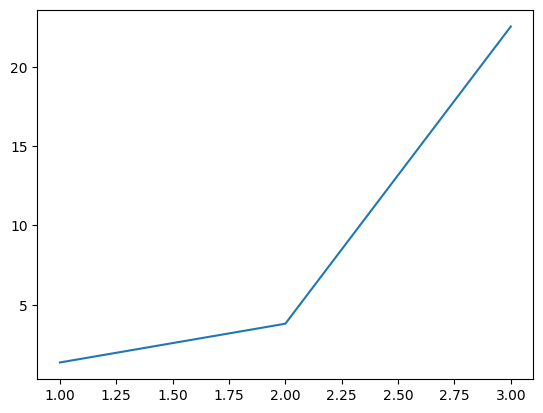

In [37]:
plt.plot(depth_list, end - start)
plt.show()

In [94]:
start = np.zeros((len(depth_list), 2 * nodes_per_team))
end = np.zeros((len(depth_list), 2 * nodes_per_team))

for i, depth in enumerate(depth_list):
    graph = im.random_graph(50)
    config = np.array([])
    
    for j in range(2 * nodes_per_team):
        start[i, j] = time.perf_counter()
        best = im.minimax_algorithm_opt(graph, config, nodes_per_team, depth)
        end[i, j] = time.perf_counter()
        config = np.append(config, best)
    

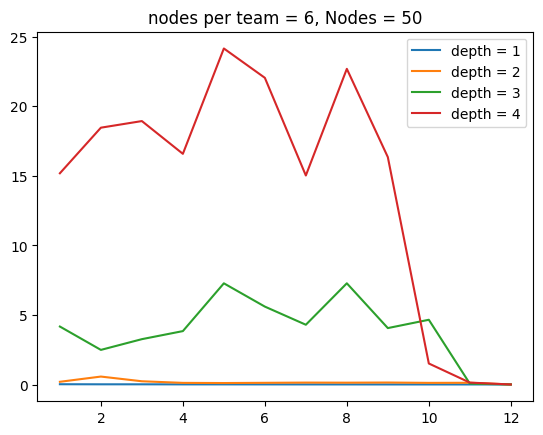

In [95]:
for i in range(len(depth_list)):
    plt.plot(np.arange(2 * nodes_per_team) + 1, end[i] - start[i], label=f'depth = {depth_list[i]}')
plt.legend()
plt.title(f"nodes per team = {nodes_per_team}, Nodes = {graph.shape[0]}")
plt.show()

In [91]:
graph = im.random_graph(12)
nodes_per_team = 4

config_greedy = np.array([])
config0 = np.array([])
config1 = np.array([])
config2 = np.array([])
config3 = np.array([])
config_inf = np.array([])

for i in range(2 * nodes_per_team):
    if i % 2 == 0:
        best_greedy = im.greedy_algorithm(graph, config_greedy, nodes_per_team)
        config_greedy = np.append(config_greedy, best_greedy)
        
        best0 = im.minimax_algorithm_opt(graph, config0, nodes_per_team, 1)
        config0 = np.append(config0, best0)
        
        best1 = im.minimax_algorithm_opt(graph, config1, nodes_per_team, 2)
        config1 = np.append(config1, best1)
        
        best2 = im.minimax_algorithm_opt(graph, config2, nodes_per_team, 3)
        config2 = np.append(config2, best2)
        
        best3 = im.minimax_algorithm_opt(graph, config3, nodes_per_team, 4)
        config3 = np.append(config3, best3)
        
        best_inf = im.minimax_algorithm_opt(graph, config_inf, nodes_per_team)
        config_inf = np.append(config_inf, best_inf)
    else:
        best_greedy = im.minimax_algorithm_opt(graph, config_greedy, nodes_per_team)
        config_greedy = np.append(config_greedy, best_greedy)
        
        best0 = im.minimax_algorithm_opt(graph, config0, nodes_per_team)
        config0 = np.append(config0, best0)
        
        best1 = im.minimax_algorithm_opt(graph, config1, nodes_per_team)
        config1 = np.append(config1, best1)
        
        best2 = im.minimax_algorithm_opt(graph, config2, nodes_per_team)
        config2 = np.append(config2, best2)
        
        best3 = im.minimax_algorithm_opt(graph, config3, nodes_per_team)
        config3 = np.append(config3, best3)
        
        best_inf = im.minimax_algorithm_opt(graph, config_inf, nodes_per_team)
        config_inf = np.append(config_inf, best_inf)

In [92]:
print(config_greedy, im.get_influence(graph, config_greedy.astype(int)))
print(config0, im.get_influence(graph, config0.astype(int)))
print(config1, im.get_influence(graph, config1.astype(int)))
print(config2, im.get_influence(graph, config2.astype(int)))
print(config3, im.get_influence(graph, config3.astype(int)))
print(config_inf, im.get_influence(graph, config_inf.astype(int)))



[ 3.  1. 11.  4.  0.  6.  5.  7.] [5.5 6.5]
[ 0.  1. 11.  3.  9.  7.  5. 10.] [5.26666667 6.73333333]
[ 3.  1. 11.  4.  0.  6.  2.  7.] [5.5 6.5]
[ 3.  1.  4.  7.  2.  6. 11. 10.] [5.83333333 6.16666667]
[11.  4.  3.  1.  0.  6.  2.  7.] [5.5 6.5]
[ 1.  3.  4.  7.  2.  0.  6. 10.] [6.16666667 5.83333333]
